In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression 

In [2]:
arcamanik = pd.read_csv('Clean arcamanik.csv')

In [7]:
arcamanik.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
0,3.0,2.0,240.0,331.0,2500000000,2500.0
1,4.0,2.0,220.0,231.0,2500000000,2500.0
2,2.0,1.0,61.0,89.0,350000000,350.0
3,2.0,1.0,45.0,100.0,575000000,575.0
4,4.0,3.0,137.0,114.0,2400000000,2400.0


In [8]:
arcamanik.describe()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah)
count,563.000000,563.000000,563.000000,563.000000,5.630000e+02,563.000000
mean,3.175844,2.195382,118.722025,132.363233,1.217364e+09,1217.363961
std,1.321591,0.947471,61.862690,63.749677,5.688777e+08,568.877648
min,1.000000,1.000000,1.500000,33.000000,2.000000e+08,200.000000
25%,2.000000,2.000000,70.000000,95.000000,7.950000e+08,795.000000
50%,3.000000,2.000000,100.000000,115.000000,1.100000e+09,1100.000000
75%,4.000000,3.000000,150.000000,151.500000,1.462500e+09,1462.500000
max,23.000000,9.000000,350.000000,400.000000,2.900000e+09,2900.000000


In [3]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(arcamanik, test_size=0.2)

In [4]:
y = train['Harga (Juta Rupiah)']
x = train[['Kamar Tidur','Kamar Mandi', 'Luas Bangunan', 'Luas Tanah']]

In [5]:
reg = LinearRegression()

In [6]:
reg.fit(x, y)

LinearRegression()

In [7]:
reg.coef_

array([-25.12854963, 132.33501541,   3.45056227,   3.83567455])

In [14]:
reg.score(x,y)

0.6813472357896831

In [15]:
def adj_r2(x,y):
    r2 = reg.score(x,y)
    n = x.shape[0]
    p = x.shape[1]
    adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
    return adjusted_r2

In [16]:
adj_r2(x,y)

0.6784829412799275

In [17]:
from sklearn.feature_selection import f_regression

In [18]:
f_regression(x,y)

(array([190.15448369, 208.45911828, 566.16815092, 469.86889279]),
 array([2.62793002e-36, 4.51705887e-39, 1.65776500e-81, 8.78930398e-72]))

In [19]:
p_values = f_regression(x,y)[1]
p_values

array([2.62793002e-36, 4.51705887e-39, 1.65776500e-81, 8.78930398e-72])

In [20]:
p_values.round(3)

array([0., 0., 0., 0.])

In [21]:
reg_summary = pd.DataFrame(data = x.columns.values, columns=['Features'])
reg_summary ['Coefficients'] = reg.coef_
reg_summary ['p-values'] = p_values.round(3)
reg_summary

,Features,Coefficients,p-values
0,Kamar Tidur,-30.863447,0.0
1,Kamar Mandi,164.005612,0.0
2,Luas Bangunan,3.153977,0.0
3,Luas Tanah,3.785740,0.0


In [22]:
x_test = test[['Kamar Tidur','Kamar Mandi', 'Luas Bangunan', 'Luas Tanah']]

In [23]:
prediction = reg.predict(x_test)

In [24]:
test['Prediksi'] = prediction

In [25]:
test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi
440,3.0,3.0,80.0,120.0,1200000000,1200.0,1186.978373
43,3.0,2.0,55.0,68.0,680000000,680.0,747.264859
136,3.0,2.0,150.0,155.0,2200000000,2200.0,1376.252058
180,3.0,2.0,120.0,143.0,1300000000,1300.0,1236.203865
278,2.0,1.0,40.0,72.0,499000000,499.0,581.955997


In [26]:
test['Diff'] = test['Harga (Juta Rupiah)']-test['Prediksi']
test['Diff %'] = ((test['Harga (Juta Rupiah)']-test['Prediksi'])/test['Harga (Juta Rupiah)'])*100
test.head()

,Kamar Tidur,Kamar Mandi,Luas Bangunan,Luas Tanah,Harga,Harga (Juta Rupiah),Prediksi,Diff,Diff %
440,3.0,3.0,80.0,120.0,1200000000,1200.0,1186.978373,13.021627,1.085136
43,3.0,2.0,55.0,68.0,680000000,680.0,747.264859,-67.264859,-9.891891
136,3.0,2.0,150.0,155.0,2200000000,2200.0,1376.252058,823.747942,37.443088
180,3.0,2.0,120.0,143.0,1300000000,1300.0,1236.203865,63.796135,4.907395
278,2.0,1.0,40.0,72.0,499000000,499.0,581.955997,-82.955997,-16.624448


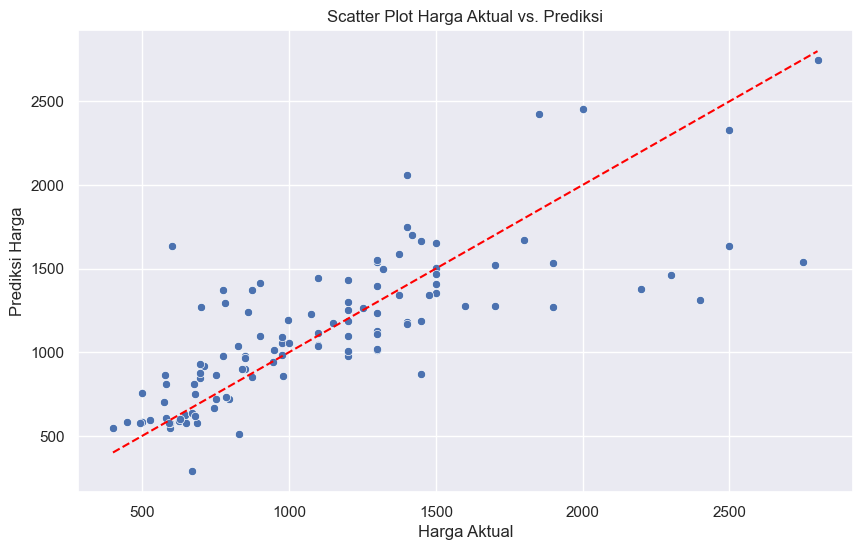

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Harga (Juta Rupiah)', y='Prediksi', data=test)
plt.plot([test['Harga (Juta Rupiah)'].min(), test['Harga (Juta Rupiah)'].max()],
         [test['Harga (Juta Rupiah)'].min(), test['Harga (Juta Rupiah)'].max()],
         linestyle='--', color='red')  # Garis referensi
plt.xlabel('Harga Aktual')
plt.ylabel('Prediksi Harga')
plt.title('Scatter Plot Harga Aktual vs. Prediksi')
plt.show()

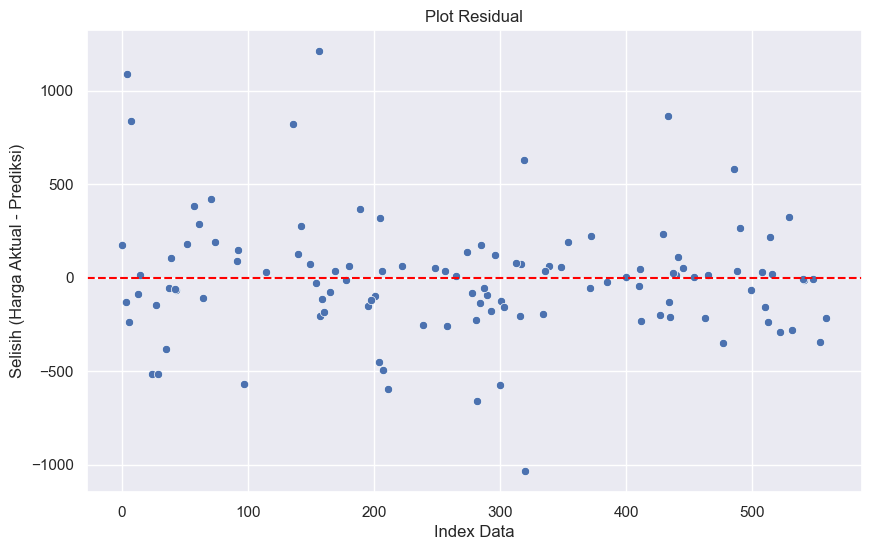

In [28]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=test.index, y='Diff', data=test)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Index Data')
plt.ylabel('Selisih (Harga Aktual - Prediksi)')
plt.title('Plot Residual')
plt.show()

In [29]:
print("Statistik Deskriptif Selisih:")
print(test['Diff'].describe())

print("\nRata-Rata Selisih:")
print(test['Diff'].mean())

print("\nStandar Deviasi Selisih:")
print(test['Diff'].std())


Statistik Deskriptif Selisih:
count     113.000000
mean       -5.768248
std       325.891541
min     -1035.577491
25%      -176.745658
50%        -6.329623
75%       104.476258
max      1211.049051
Name: Diff, dtype: float64

Rata-Rata Selisih:
-5.768248464337204

Standar Deviasi Selisih:
325.89154128086096
